In [13]:
import kit
from kit import penguin_color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()
import scipy


In [5]:
species = list(pg['species'].unique())
measures = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [11]:
stats = pg[pg['species'] == species[0]][measures[0]].describe()

In [19]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

<Axes: xlabel='bill_length_mm', ylabel='Density'>

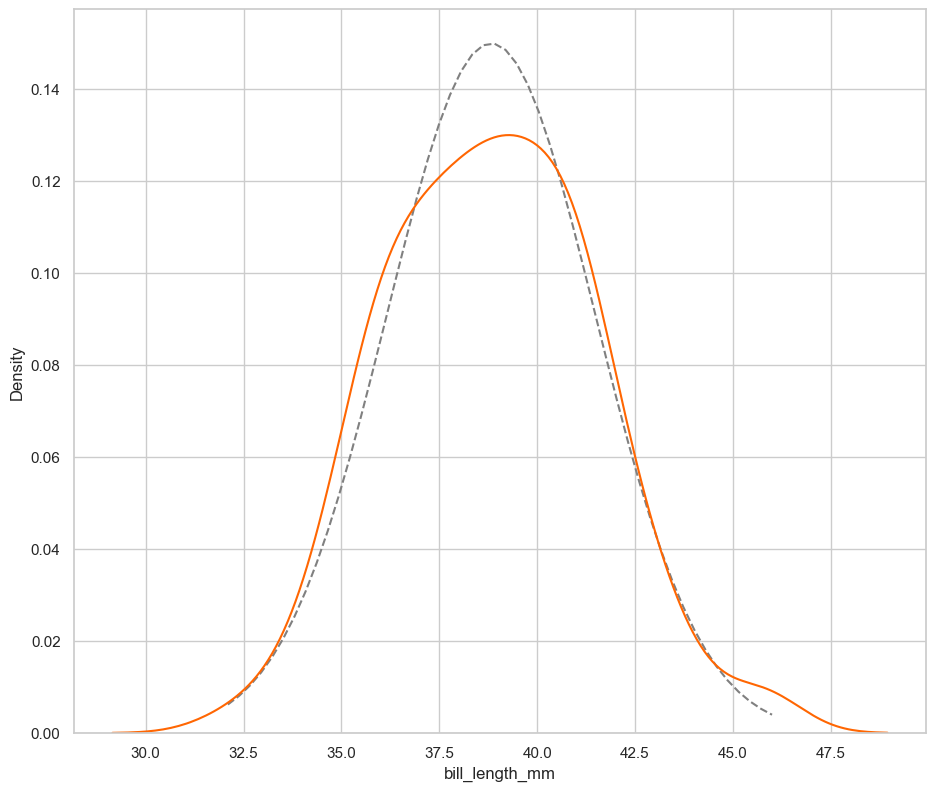

In [27]:
plt.plot(xs, ys, color= 'gray', linestyle='dashed')
sns.kdeplot(
    data= pg[pg['species'] == species[0]],
    x= measures[0],
    color= penguin_color[species[0]]
)

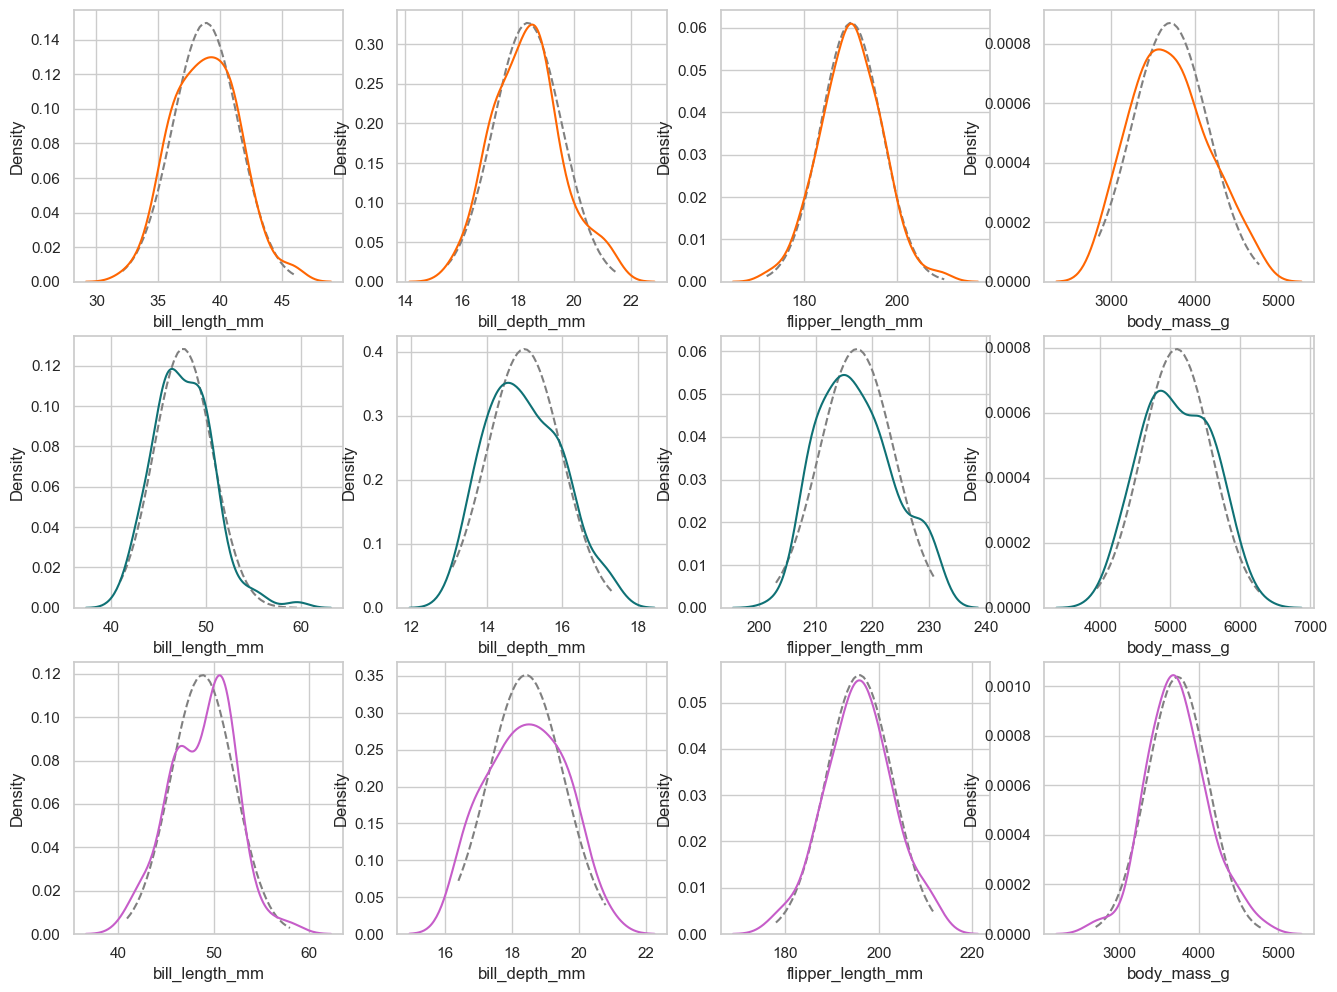

In [45]:
fig, ax = plt.subplots(len(species), len(measures), figsize=(16, 12))

for i in range(len(species)):
    for j in range(len(measures)):
        stats = pg[pg['species'] == species[i]][measures[j]].describe()

        xs = np.linspace(stats['min'], stats['max'])
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i, j].plot(xs, ys, color='gray', linestyle='dashed')
        # ax[i, j].set_title(f"{species[i]} - {measures[j]}")

        sns.kdeplot(
            ax= ax[i, j],
            data= pg[pg['species'] == species[i]],
            x= measures[j],
            color= penguin_color[species[i]]
        )